# LABORATORIO INTEGRADOR N° 2

Autor: Serafini, Martin Nicolas

Mayo 2025


En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [300]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imread
from google.colab.patches import cv2_imshow

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [301]:
!wget -O cartel.jpg https://farm4.staticflickr.com/3647/3321122805_de8d02ff4e_z.jpg

--2025-05-01 17:03:54--  https://farm4.staticflickr.com/3647/3321122805_de8d02ff4e_z.jpg
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 108.156.94.80, 2600:9000:2351:6a00:0:5a51:64c9:c681, 2600:9000:2351:9c00:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|108.156.94.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘cartel.jpg’

cartel.jpg              [ <=>                ]  93.71K  --.-KB/s    in 0.02s   

2025-05-01 17:03:54 (3.88 MB/s) - ‘cartel.jpg’ saved [95955]



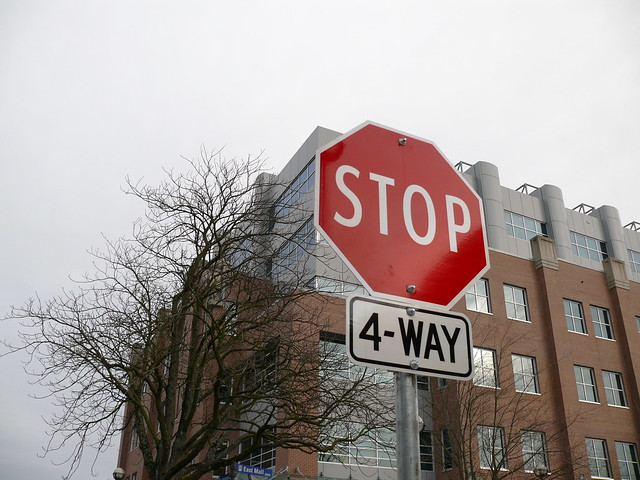

In [302]:
imagen_original = cv2.imread('cartel.jpg')
cv2_imshow(imagen_original)

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [303]:
# Convierto a HLS para procesar la imagen, los canales H y S son similares al H y S de HSV, el L es analogo al al V
imagen_hls=cv2.cvtColor(imagen_original,cv2.COLOR_BGR2HLS)

In [304]:
# Separo por cada canal
h = imagen_hls[:,:,0]
l = imagen_hls[:,:,1]
s = imagen_hls[:,:,2]

In [305]:
# El clip le incrementa un 20% mas brillo
l = np.clip(l.astype(np.float32) * 1.2, 0, 255).astype(np.uint8)
# normaalize es una ecualizacion que trabaja con una distribucion normal.
l_norm = cv2.normalize(l, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

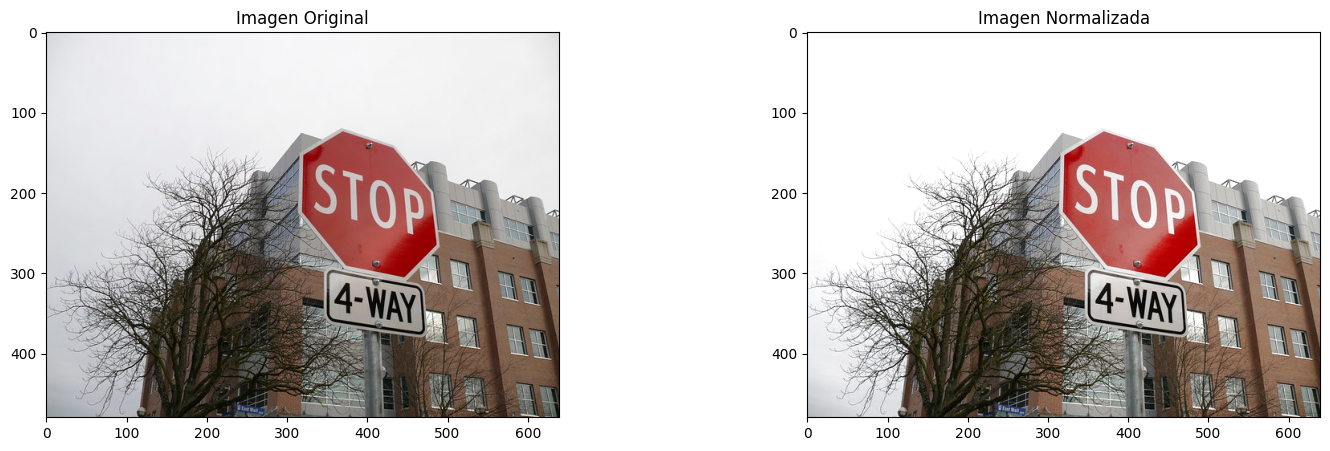

In [306]:
imagen_hls_copy = imagen_hls.copy()
imagen_hls_copy[:,:,1] = l_norm
imagen_bgr_normalizacion = cv2.cvtColor(imagen_hls_copy, cv2.COLOR_HLS2BGR)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')

axes[1].imshow(cv2.cvtColor(imagen_bgr_normalizacion, cv2.COLOR_BGR2RGB))
axes[1].set_title('Imagen Normalizada')

plt.show()

De la comparacion se aprecia que gano mas nitidez en el cartel con el incremento del brillo

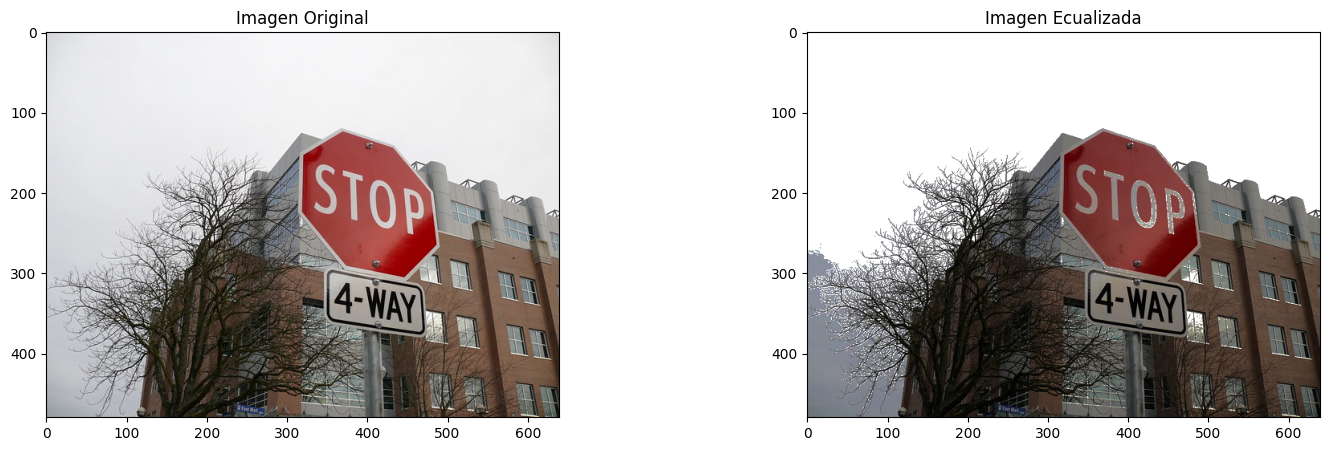

In [307]:
# Comparamos la normalizacion con la ecualizacion
l_eq = cv2.equalizeHist(l)
imagen_hls_copy = imagen_hls.copy()
imagen_hls_copy[:,:,1] = l_eq
imagen_bgr_eq = cv2.cvtColor(imagen_hls_copy, cv2.COLOR_HLS2BGR)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Imagen Original')

axes[1].imshow(cv2.cvtColor(imagen_bgr_eq, cv2.COLOR_BGR2RGB))
axes[1].set_title('Imagen Ecualizada')

plt.show()



La aplicacion de la ecualizacion no genera mejoras por lo que se opta por utilizar la normalizada.

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [308]:
# Usamos de base la imagen generada por medio de la normalizacion
imagen_hsv=cv2.cvtColor(imagen_bgr_normalizacion,cv2.COLOR_BGR2HSV)
h = imagen_hsv[:,:,0]
s = imagen_hsv[:,:,1]
v = imagen_hsv[:,:,2]

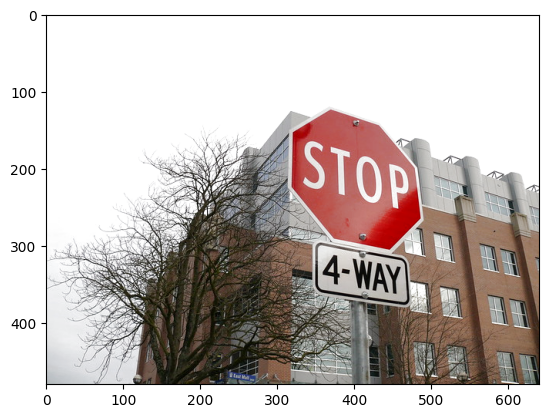

In [309]:
# La convierto a RGB
imagen_rgb = cv2.cvtColor(imagen_bgr_normalizacion, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.show()

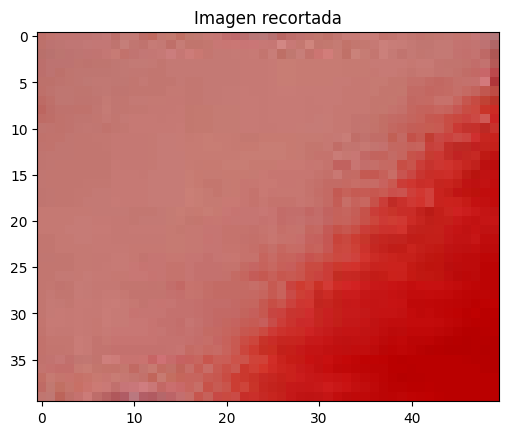

In [310]:
# Dado que quiero segmentar el cartel genero un recorte para determinar valores para la segmanetacion
# Defino las coordenadas del recorte
x_start = 400  # Coordenada x inicial del recorte
y_start = 245   # Coordenada y inicial del recorte
ancho = 50   # Ancho del recorte
alto = 40  # Alto del recorte

# Recorta la imagen
recorte = imagen_rgb[y_start:y_start + alto, x_start:x_start + ancho]

# Muestra la imagen recortada
plt.imshow(recorte)
plt.title('Imagen recortada')
plt.show()

In [311]:
recorte.shape

(40, 50, 3)

In [312]:
# Con el recorte generado calculo los minimos y maximos
r_recorte = recorte[:,:,0]
g_recorte = recorte[:,:,1]
b_recorte = recorte[:,:,2]
minimo_r = np.min(r_recorte)
maximo_r = np.max(r_recorte)
minimo_g = np.min(g_recorte)
maximo_g = np.max(g_recorte)
minimo_b = np.min(b_recorte)
maximo_b = np.max(b_recorte)
minimo_r,maximo_r,minimo_g,maximo_g,minimo_b,maximo_b


(np.uint8(174),
 np.uint8(211),
 np.uint8(0),
 np.uint8(135),
 np.uint8(0),
 np.uint8(132))

### Segmentacion - Primer intento

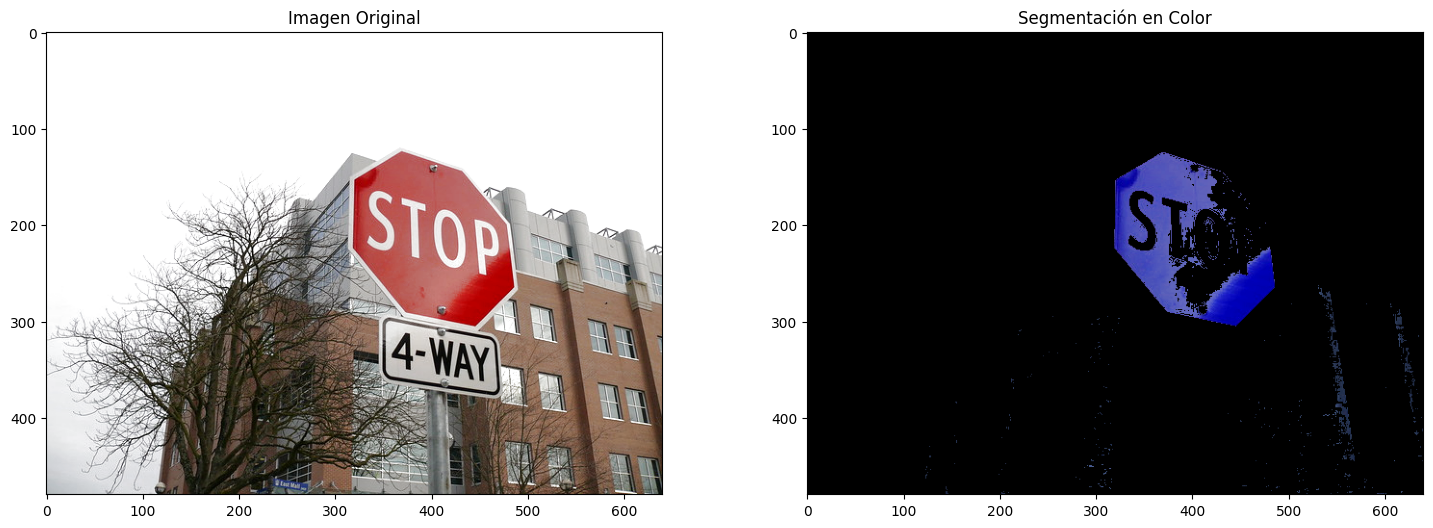

In [313]:
# Definir rangos de rojo
rojo_bajo = np.array([0, 120, 70])
rojo_alto = np.array([10, 255, 255])
rojo_bajo2 = np.array([170, 120, 70])
rojo_alto2 = np.array([180, 255, 255])

# Crear máscara para ambos rangos
mascara1 = cv2.inRange(imagen_hsv, rojo_bajo, rojo_alto)
mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)

# Combinar máscaras
mascara_roja = cv2.bitwise_or(mascara1, mascara2)

imagen_bgr_norm3 = imagen_bgr_normalizacion.copy()
# Aplicar la máscara a la imagen original para obtener la segmentación en color
imagen_segmentada = cv2.bitwise_and(imagen_bgr_norm3, imagen_bgr_norm3, mask=mascara_roja)

# Mostrar la imagen original y la segmentación en color juntas
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)  # Mostrar la segmentación en color
plt.title('Segmentación en Color')

plt.show()

Se plantea usar findContours para obtener el contorerno de mayor suuperficie y que segmente el cartel

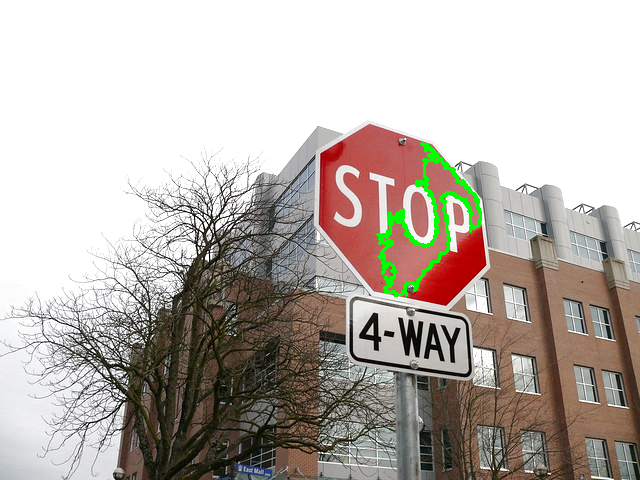

In [314]:
mascara_roja_gris = cv2.cvtColor(resultado_rojo_1, cv2.COLOR_BGR2GRAY)
# Umbral (si hiciera falta reforzar binarización)
_, binary = cv2.threshold(mascara_roja_gris, 127, 255, cv2.THRESH_BINARY)

# Detectar contornos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contorno_mayor = max(contours, key=cv2.contourArea)

imagen_bgr_norm2 = imagen_bgr_normalizacion.copy()

cv2.drawContours(imagen_bgr_norm2, [contorno_mayor], -1, (0, 255, 0), 2)

cv2_imshow(imagen_bgr_norm2)


El resultado no es el esperado, el contorno no incluye todo el cartel, solo resalta la zona de brillo que es la de mayor superficie.

Opto por otra estrategia.


### Segmentacion - Segundo Intento

In [315]:
# Se determinan rangos
limite_inferior_rojo = np.array([0, 20, 20])
limite_superior_rojo = np.array([3, 255, 255])

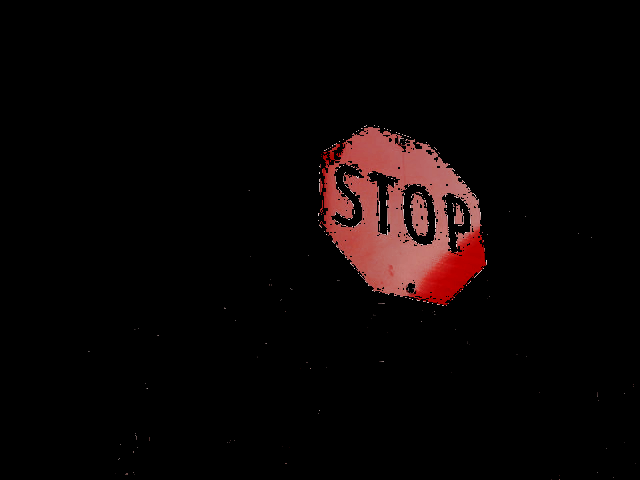

In [316]:
mascara_roja_1 = cv2.inRange(imagen_hsv, limite_inferior_rojo, limite_superior_rojo)
resultado_rojo_1 = cv2.bitwise_and(imagen_bgr_normalizacion, imagen_bgr_normalizacion, mask=mascara_roja_1)
cv2_imshow(resultado_rojo_1)

In [317]:
mascara_roja.shape

(480, 640)

In [318]:
mascara_roja.max()

np.uint8(255)

#### Segmentacion - Limpieza de pixeles

Genero una limpieza por umbral tanto en filas como en columnas.

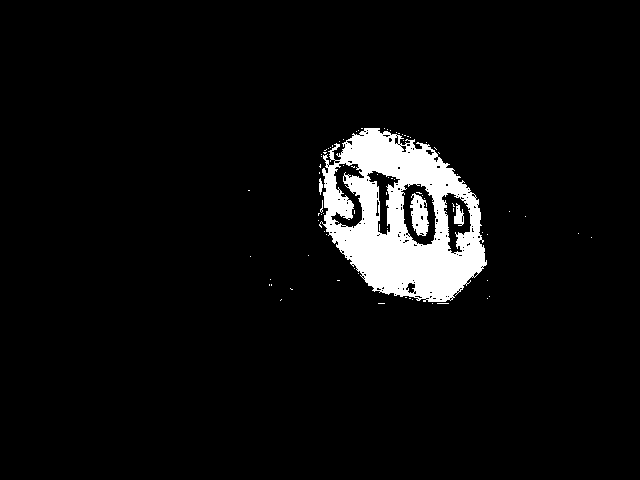

In [319]:
N,M = mascara_roja_1.shape

mascara_copia = mascara_roja_1.copy()
mascara_copia[mascara_copia == 255] = 1

limpia_h = mascara_copia.copy()
for i in range(N):
    s = np.sum(limpia_h[i,:])
    if s<15:
        limpia_h[i,:] = 0
cv2_imshow(limpia_h*255)

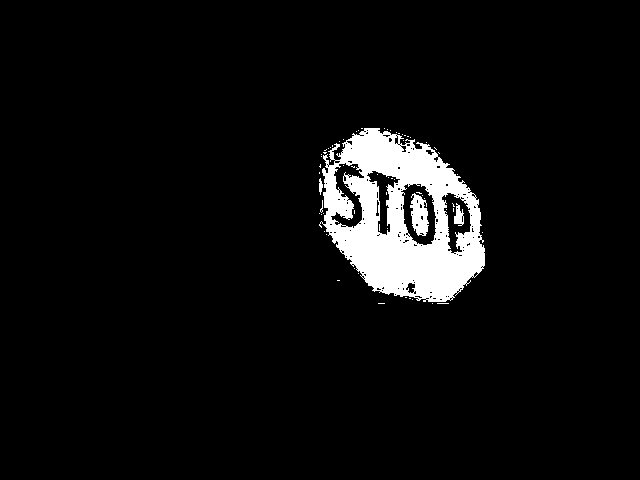

In [320]:
limpia_v = limpia_h.copy()
for i in range(M):
    s = np.sum(limpia_v[:,i])
    if s<15:
        limpia_v[:,i] = 0
cv2_imshow(limpia_v*255)

El resultado de la segmentacion mejoro considerablemente el inicial

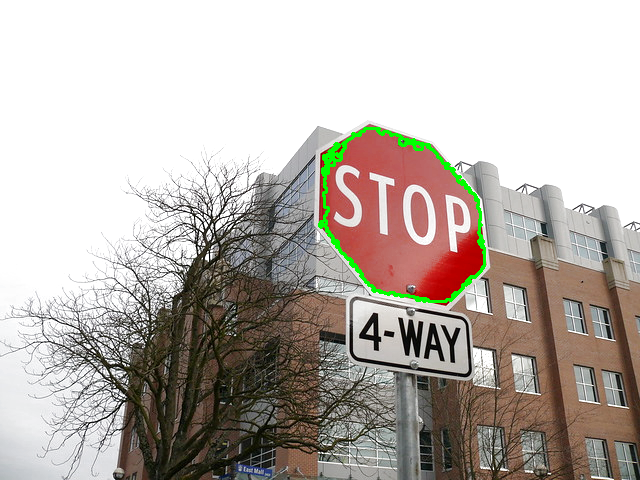

In [321]:
limpia_v_bgr = cv2.cvtColor(limpia_v*255, cv2.COLOR_GRAY2BGR)
limpia_v_gris = cv2.cvtColor(limpia_v_bgr, cv2.COLOR_BGR2GRAY)
# Umbral (si hiciera falta reforzar binarización)
_, binary = cv2.threshold(limpia_v_gris, 127, 255, cv2.THRESH_BINARY)

# Detectar contornos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contorno_mayor = max(contours, key=cv2.contourArea)

imagen_bgr_norm2 = imagen_bgr_normalizacion.copy()

cv2.drawContours(imagen_bgr_norm2, [contorno_mayor], -1, (0, 255, 0), 2)

cv2_imshow(imagen_bgr_norm2)

#### Conclusion
El resultado de la segmentacion mejoro considerablemente el inicial, la luz natural y el material brilloso del cartel genera dificultad para hacer una segmentacion mas precisa por color

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

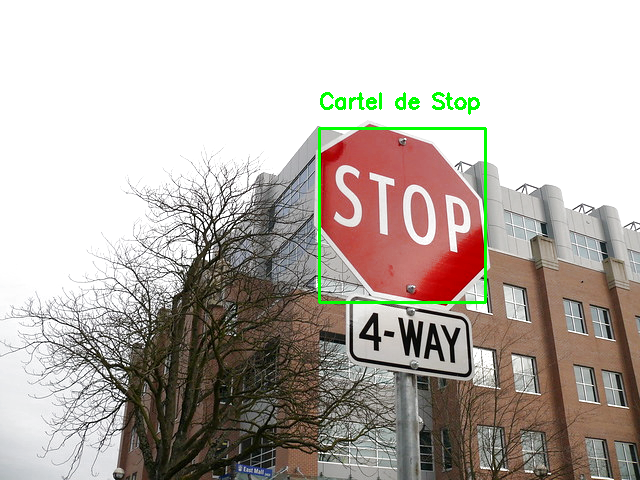

In [322]:
# prompt: Quiero dibujar un recuadro verde alrededor de contorno_mayor
imagen_bgr_norm4 = imagen_bgr_normalizacion.copy()
# Dibujar un rectángulo verde alrededor de contorno_mayor
x, y, w, h = cv2.boundingRect(contorno_mayor)
cv2.rectangle(imagen_bgr_norm4, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(imagen_bgr_norm4, "Cartel de Stop", (x, y-20),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Dibuja el rectángulo

cv2_imshow(imagen_bgr_norm4)


In [323]:
x,y,w,h

(319, 128, 166, 174)

## Adicional - Ajuste de **perspectiva**

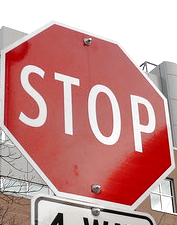

In [324]:
recorte_perspectiva = imagen_bgr_normalizacion[100:325, 315:492]
cv2_imshow(recorte_perspectiva)

In [325]:
recorte_perspectiva.shape

(225, 177, 3)

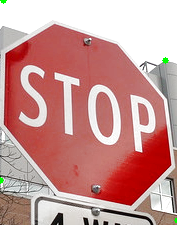

In [346]:
# Coordenadas x,y de los vertices
corners = [
    (3, 0),       # Superior izquierdo
    (165, 60),    # Superior derecho
    (0, 180),     # Inferior izquierdo
    (177, 220)    # Inferior derecho
]
# Marco los vertices para tener las referencias
recorte_perspectiva_copy = recorte_perspectiva.copy()
for x, y in corners:
    cv2.circle(recorte_perspectiva_copy, (x,y), radius=0, color=(0,255, 0), thickness=5)
cv2_imshow(recorte_perspectiva_copy)

In [347]:
# Determino el tamaño que va a tener la imagen corregida (la agrando un 5% aproximadamente)
w, h = 600, 600

In [348]:
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [349]:
# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

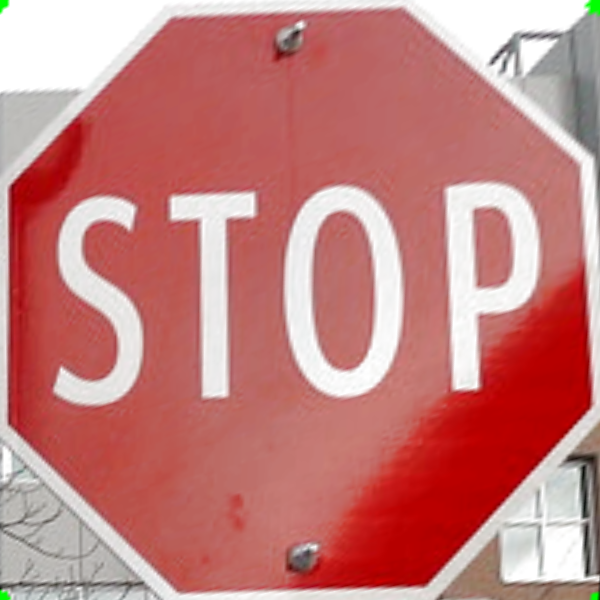

In [350]:
# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz de transformacion obtenida en getPerspectiveTransform y el tercero debe ser una tupla con especificando (ancho, alto)
img_output = cv2.warpPerspective(recorte_perspectiva_copy, matrix, (w, h))
cv2_imshow(img_output)

Habria que segrui iterando si se quiere conseguir un encuadre mejorado, pero el resultado obtenido lo considero suficiente para lo que habia planteado.

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución